<a href="https://colab.research.google.com/github/VedikaSrivastava/ds-cpcs-localrepo/blob/essex-plymouth/deliverable3_essex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import re
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import chi2

In [ ]:
data_essex = pd.read_excel("/content/gdrive/Shareddrives/BU Spark! CS506 - CPCS Team/DAMION Database Data/Essex/EssexData Arraigned  01-01-2004_01-20-2022.xlsx")

In [ ]:

data_essex_drpna = data_essex.dropna()
data_essex

,Id Cs,Id Prsn Mstr,Code Evnt,Date Evnt,Desc Ofcr Agncy,Desc Crt Lctn (ACTION EVENT),Date Crm,Code Cs Sts,Code Rc,Code Sex,...,Nmbr Day Actl Jl Impsd,Nmbr Day Actl Jl Impsd Unt,Nmbr Rcmd Cmnty Srvc Min,Nmbr R Cmnty Srvc Min Unt,Nmbr Rcmd Cmnty Srvc,Nmbr R Cmnty Srvc Unt,Nmbr Impsd Cmnty Srvc Min,Nmbr Impsd Cmnty Srvc Min Unt,Nmbr Impsd Cmnty Srvc,Nmbr Impsd Cmnty Srvc Unt
518547,160919,279073,ARR,2009-05-29,State Police Danvers,Salem Superior Court,2009-02-24 00:00:00,C,W,M,...,2.5,Y,1.0,Y,1.0,Y,1.0,Y,1.0,Y
518553,160919,279073,ARR,2009-02-25,State Police Danvers,Salem District Court,2009-02-24 00:00:00,C,W,M,...,2.5,Y,1.0,Y,1.0,Y,1.0,Y,1.0,Y
518556,160919,279073,ARR,2009-05-20,State Police Danvers,Salem Superior Court,2009-02-24 00:00:00,C,W,M,...,2.5,Y,1.0,Y,1.0,Y,1.0,Y,1.0,Y
557387,178918,300224,ARR,2010-01-11,Lynn Drug Task Force,Lynn District Court,1998-03-30 00:00:00,C,H,M,...,3.0,M,100.0,H,100.0,H,100.0,H,100.0,H


In [ ]:
data_essex.describe()

,Id Cs,Id Prsn Mstr,Id Dfndnt Chrg,Nmbr Day Jl Rcmnd Min,Nmbr Day Jl Rcmnd,Nmbr Day Jl Impsd Min,Nmbr Day Jl Impsd,Nmbr D Jl Spnd Rcmnd Min,Nmbr Day Jl Spnd Rcmnd,Nmbr Day Jl Spnd Impsd Min,Nmbr Day Jl Spnd Impsd,Nmbr D Actl Jl Rcmnd Min,Nmbr Day Actl Jl Rcmnd,Nmbr Day Actl Jl Impsd Min,Nmbr Day Actl Jl Impsd,Nmbr Rcmd Cmnty Srvc Min,Nmbr Rcmd Cmnty Srvc,Nmbr Impsd Cmnty Srvc Min,Nmbr Impsd Cmnty Srvc
count,4.00,4.00,4.00,4.000,4.000,4.000,4.000,4.0,4.0,4.0,4.0,4.000,4.000,4.000,4.000,4.00,4.00,4.00,4.00
mean,165418.75,284360.75,485165.25,2.125,2.125,2.125,2.125,4.5,4.5,3.0,3.0,2.625,2.625,2.625,2.625,25.75,25.75,25.75,25.75
std,8999.50,10575.50,17648.50,0.750,0.750,0.750,0.750,1.0,1.0,0.0,0.0,0.250,0.250,0.250,0.250,49.50,49.50,49.50,49.50
min,160919.00,279073.00,476341.00,1.000,1.000,1.000,1.000,3.0,3.0,3.0,3.0,2.500,2.500,2.500,2.500,1.00,1.00,1.00,1.00
25%,160919.00,279073.00,476341.00,2.125,2.125,2.125,2.125,4.5,4.5,3.0,3.0,2.500,2.500,2.500,2.500,1.00,1.00,1.00,1.00
50%,160919.00,279073.00,476341.00,2.500,2.500,2.500,2.500,5.0,5.0,3.0,3.0,2.500,2.500,2.500,2.500,1.00,1.00,1.00,1.00
75%,165418.75,284360.75,485165.25,2.500,2.500,2.500,2.500,5.0,5.0,3.0,3.0,2.625,2.625,2.625,2.625,25.75,25.75,25.75,25.75
max,178918.00,300224.00,511638.00,2.500,2.500,2.500,2.500,5.0,5.0,3.0,3.0,3.000,3.000,3.000,3.000,100.00,100.00,100.00,100.00


In [ ]:
data_essex.columns

Index(['Id Cs', 'Id Prsn Mstr', 'Code Evnt', 'Date Evnt', 'Desc Ofcr Agncy',
       'Desc Crt Lctn (ACTION EVENT)', 'Date Crm', 'Code Cs Sts', 'Code Rc',
       'Code Sex', 'Date Dspstn', 'Code Chrg', 'Name Jdg', 'Desc Dspstn',
       'Code Dspstn', 'Code Chrg Mdfr', 'Code Lf', 'Code Lf Prsctr',
       'Desc Chrg', 'Id Dfndnt Chrg', 'Nmbr Day Jl Rcmnd Min',
       'Nmbr Day Jl Rcmnd Min Unt', 'Nmbr Day Jl Rcmnd',
       'Nmbr Day Jl Rcmnd Unt', 'Nmbr Day Jl Impsd Min',
       'Nmbr Day Jl Impsd Min Unt', 'Nmbr Day Jl Impsd',
       'Nmbr Day Jl Impsd Unt', 'Nmbr D Jl Spnd Rcmnd Min',
       'Nmbr D Jl Spnd R Min Unt', 'Nmbr Day Jl Spnd Rcmnd',
       'Nmbr D Jl Spnd R Unt', 'Nmbr Day Jl Spnd Impsd Min',
       'Nmbr Day Jl Spnd Impsd Min Unt', 'Nmbr Day Jl Spnd Impsd',
       'Nmbr Day Jl Spnd Impsd Unt', 'Nmbr D Actl Jl Rcmnd Min',
       'Nmbr Day Act Jl R Min Unt', 'Nmbr Day Actl Jl Rcmnd',
       'Nmbr Day Act Jl R Unt', 'Nmbr Day Actl Jl Impsd Min',
       'Nmbr Day Actl Jl Impsd 

In [ ]:
data_essex.isna().sum()

Id Cs                             0
Id Prsn Mstr                      0
Code Evnt                         0
Date Evnt                         0
Desc Ofcr Agncy                   0
Desc Crt Lctn (ACTION EVENT)      0
Date Crm                          0
Code Cs Sts                       0
Code Rc                           0
Code Sex                          0
Date Dspstn                       0
Code Chrg                         0
Name Jdg                          0
Desc Dspstn                       0
Code Dspstn                       0
Code Chrg Mdfr                    0
Code Lf                           0
Code Lf Prsctr                    0
Desc Chrg                         0
Id Dfndnt Chrg                    0
Nmbr Day Jl Rcmnd Min             0
Nmbr Day Jl Rcmnd Min Unt         0
Nmbr Day Jl Rcmnd                 0
Nmbr Day Jl Rcmnd Unt             0
Nmbr Day Jl Impsd Min             0
Nmbr Day Jl Impsd Min Unt         0
Nmbr Day Jl Impsd                 0
Nmbr Day Jl Impsd Unt       

In [ ]:
data_essex["Code Rc"]

518547    W
518553    W
518556    W
557387    H
Name: Code Rc, dtype: object

In [ ]:
data_essex["Code Chrg"]

0          266/18/B
1          266/20/A
2         265/15A/A
3         265/13A/B
4          94C/34/G
            ...    
920163      90/23/G
920164      90/23/G
920165       90/13A
920166       90/13A
920167    265/13K/F
Name: Code Chrg, Length: 920168, dtype: object

In [ ]:
data_essex["Desc Chrg"].unique()

array(['B&E DAYTIME FOR FELONY c266 Â§18',
       'LARCENY FROM BUILDING c266 Â§20',
       'A&B WITH DANGEROUS WEAPON  c265 Â§15A(b)', ...,
       'BESTIALITY c272 Â§34', 'FISHERY, DISTURB c130 Â§95',
       'FURNISH MARIJUANA TO PERSON < 21 YEARS OLD  c94G Â§13(i)'],
      dtype=object)

In [ ]:
def chi_square_test(df, col1, col2):
    """
    run chi-square test of independence
    """
    # create contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    # run chi-square test
    stat, p, dof, expected = chi2_contingency(contingency_table)
    # print results
    print('Chi-square test of independence')
    print('Chi-square value: {}'.format(stat))
    print('p-value: {}'.format(p))
    print('Degrees of freedom: {}'.format(dof))
    print('Expected values:')
    print(expected,"\n\n\n")
    # visualize the results
    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title('Chi-Square Test of Independence - contingency_table')
    ax.set_xlabel(col2)
    ax.set_ylabel(col1)
    plt.show()

    print("\n\n\n")
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

    print("\n\n\n")
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

Chi-square test of independence
Chi-square value: 200922.3482292435
p-value: 0.0
Degrees of freedom: 16119
Expected values:
[[3.21747000e-02 7.23930751e-02 8.04367501e-03 ... 2.16374858e+00
  6.64407556e+00 8.04367501e-02]
 [4.44644265e-02 1.00044960e-01 1.11161066e-02 ... 2.99023268e+00
  9.18190407e+00 1.11161066e-01]
 [3.78295624e-01 8.51165153e-01 9.45739059e-02 ... 2.54403807e+01
  7.81180463e+01 9.45739059e-01]
 ...
 [2.30753511e-03 5.19195399e-03 5.76883777e-04 ... 1.55181736e-01
  4.76505999e-01 5.76883777e-03]
 [2.00919044e-01 4.52067848e-01 5.02297609e-02 ... 1.35118057e+01
  4.14897825e+01 5.02297609e-01]
 [2.27721017e+00 5.12372289e+00 5.69302543e-01 ... 1.53142384e+02
  4.70243900e+02 5.69302543e+00]] 





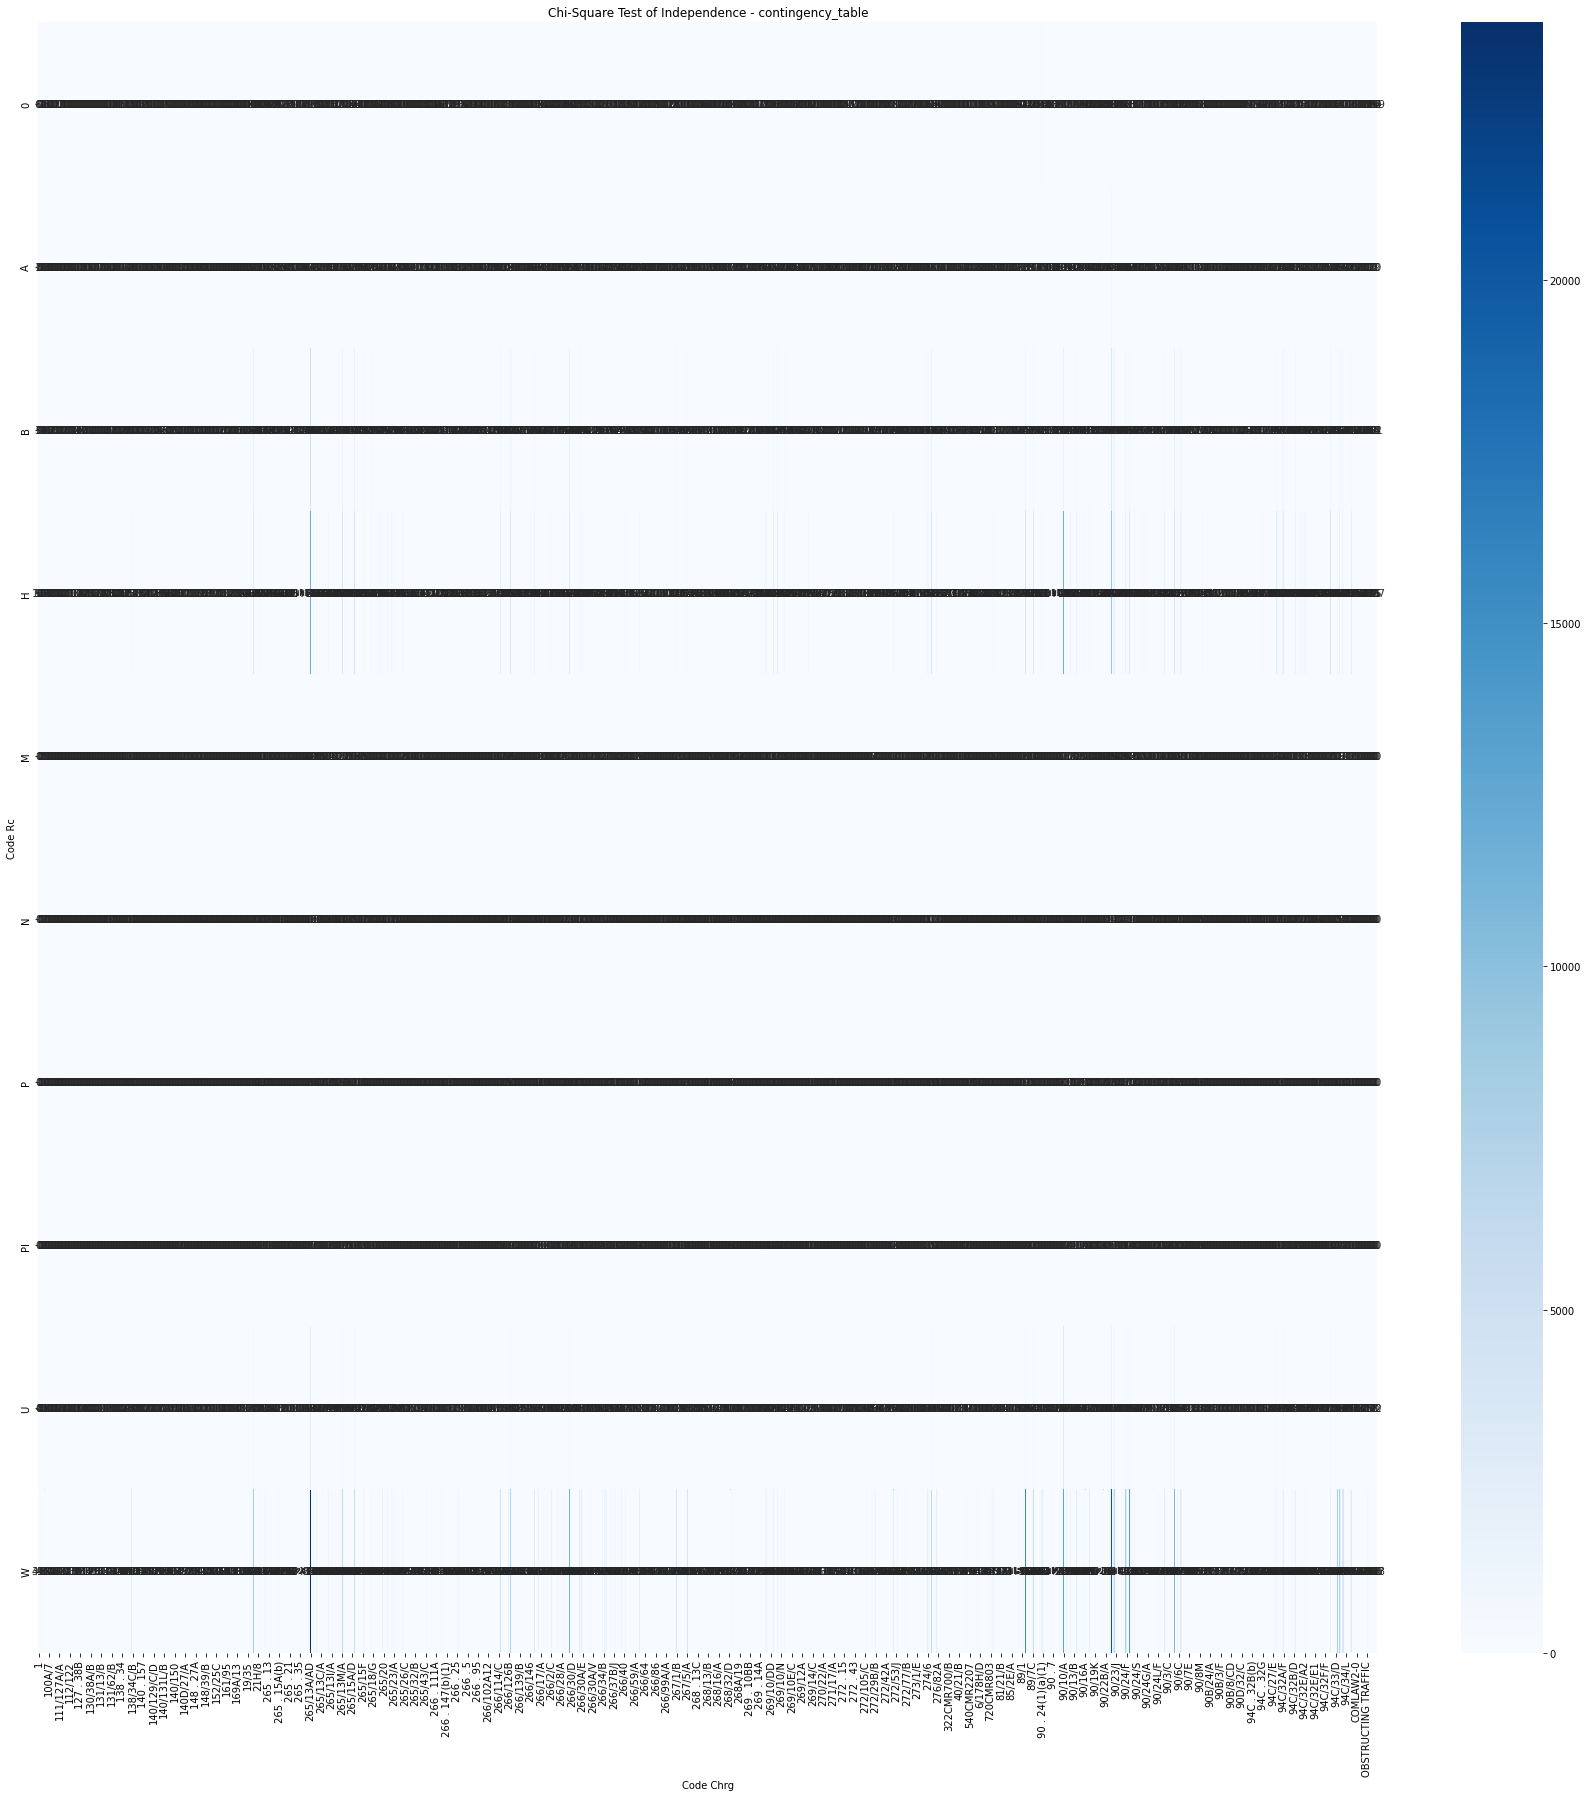





probability=0.950, critical=16415.465, stat=200922.348
Dependent (reject H0)




significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
chi_square_test(data_essex, "Code Rc", "Code Chrg")

In [ ]:
data_essex["Code Chrg"][0].find("94C")

-1

In [ ]:
data_essex.iloc[-1]

Id Cs                                                          448928
Id Prsn Mstr                                                   544368
Code Evnt                                                         ARR
Date Evnt                                         2022-01-20 00:00:00
Desc Ofcr Agncy                              Newburyport Police Dept.
Desc Crt Lctn (ACTION EVENT)               Newburyport District Court
Date Crm                                          2021-09-30 00:00:00
Code Cs Sts                                                         O
Code Rc                                                             W
Code Sex                                                            M
Date Dspstn                                                       NaN
Code Chrg                                                   265/13K/F
Name Jdg                                                          NaN
Desc Dspstn                                                       NaN
Code Dspstn         

In [ ]:
data_essex_drpna = data_essex[["Code Rc", "Code Chrg"]].dropna()
data_essex_drpna

,Code Rc,Code Chrg
2,W,265/15A/A
3,W,265/13A/B
4,W,94C/34/G
5,W,269/10/B
6,W,265/13A/B
...,...,...
920163,W,90/23/G
920164,W,90/23/G
920165,W,90/13A
920166,W,90/13A


In [ ]:
data_essex_drpna.isnull().sum()

Code Rc      0
Code Chrg    0
dtype: int64

In [ ]:
def find_null_rows(df):
    null_rows = []
    for i in range(len(df)):
        if df.iloc[i].isnull().any():
            null_rows.append(i)
    return null_rows

In [ ]:
find_null_rows(data_essex_drpna)

[]

In [ ]:
data_essex_94C = data_essex_drpna[data_essex_drpna["Code Chrg"].str.contains("94C", na=False)]

Chi-square test of independence
Chi-square value: 30772.95423444105
p-value: 0.0
Degrees of freedom: 1278
Expected values:
[[2.67471172e+00 2.04027875e+00 3.74892209e-01 ... 9.71835957e+00
  2.41517096e+00 4.30332999e+01]
 [2.48498947e+00 1.89555801e+00 3.48300411e-01 ... 9.02901835e+00
  2.24385842e+00 3.99808683e+01]
 [3.17840570e+01 2.42449814e+01 4.45490825e+00 ... 1.15484929e+02
  2.86998897e+01 5.11372065e+02]
 ...
 [9.67211471e-02 7.37792039e-02 1.35566028e-02 ... 3.51428858e-01
  8.73358067e-02 1.55614158e+00]
 [1.76739296e+01 1.34817307e+01 2.47720846e+00 ... 6.42168655e+01
  1.59589391e+01 2.84354948e+02]
 [1.89885932e+02 1.44845603e+02 2.66147398e+01 ... 6.89935947e+02
  1.71460343e+02 3.05506504e+03]] 





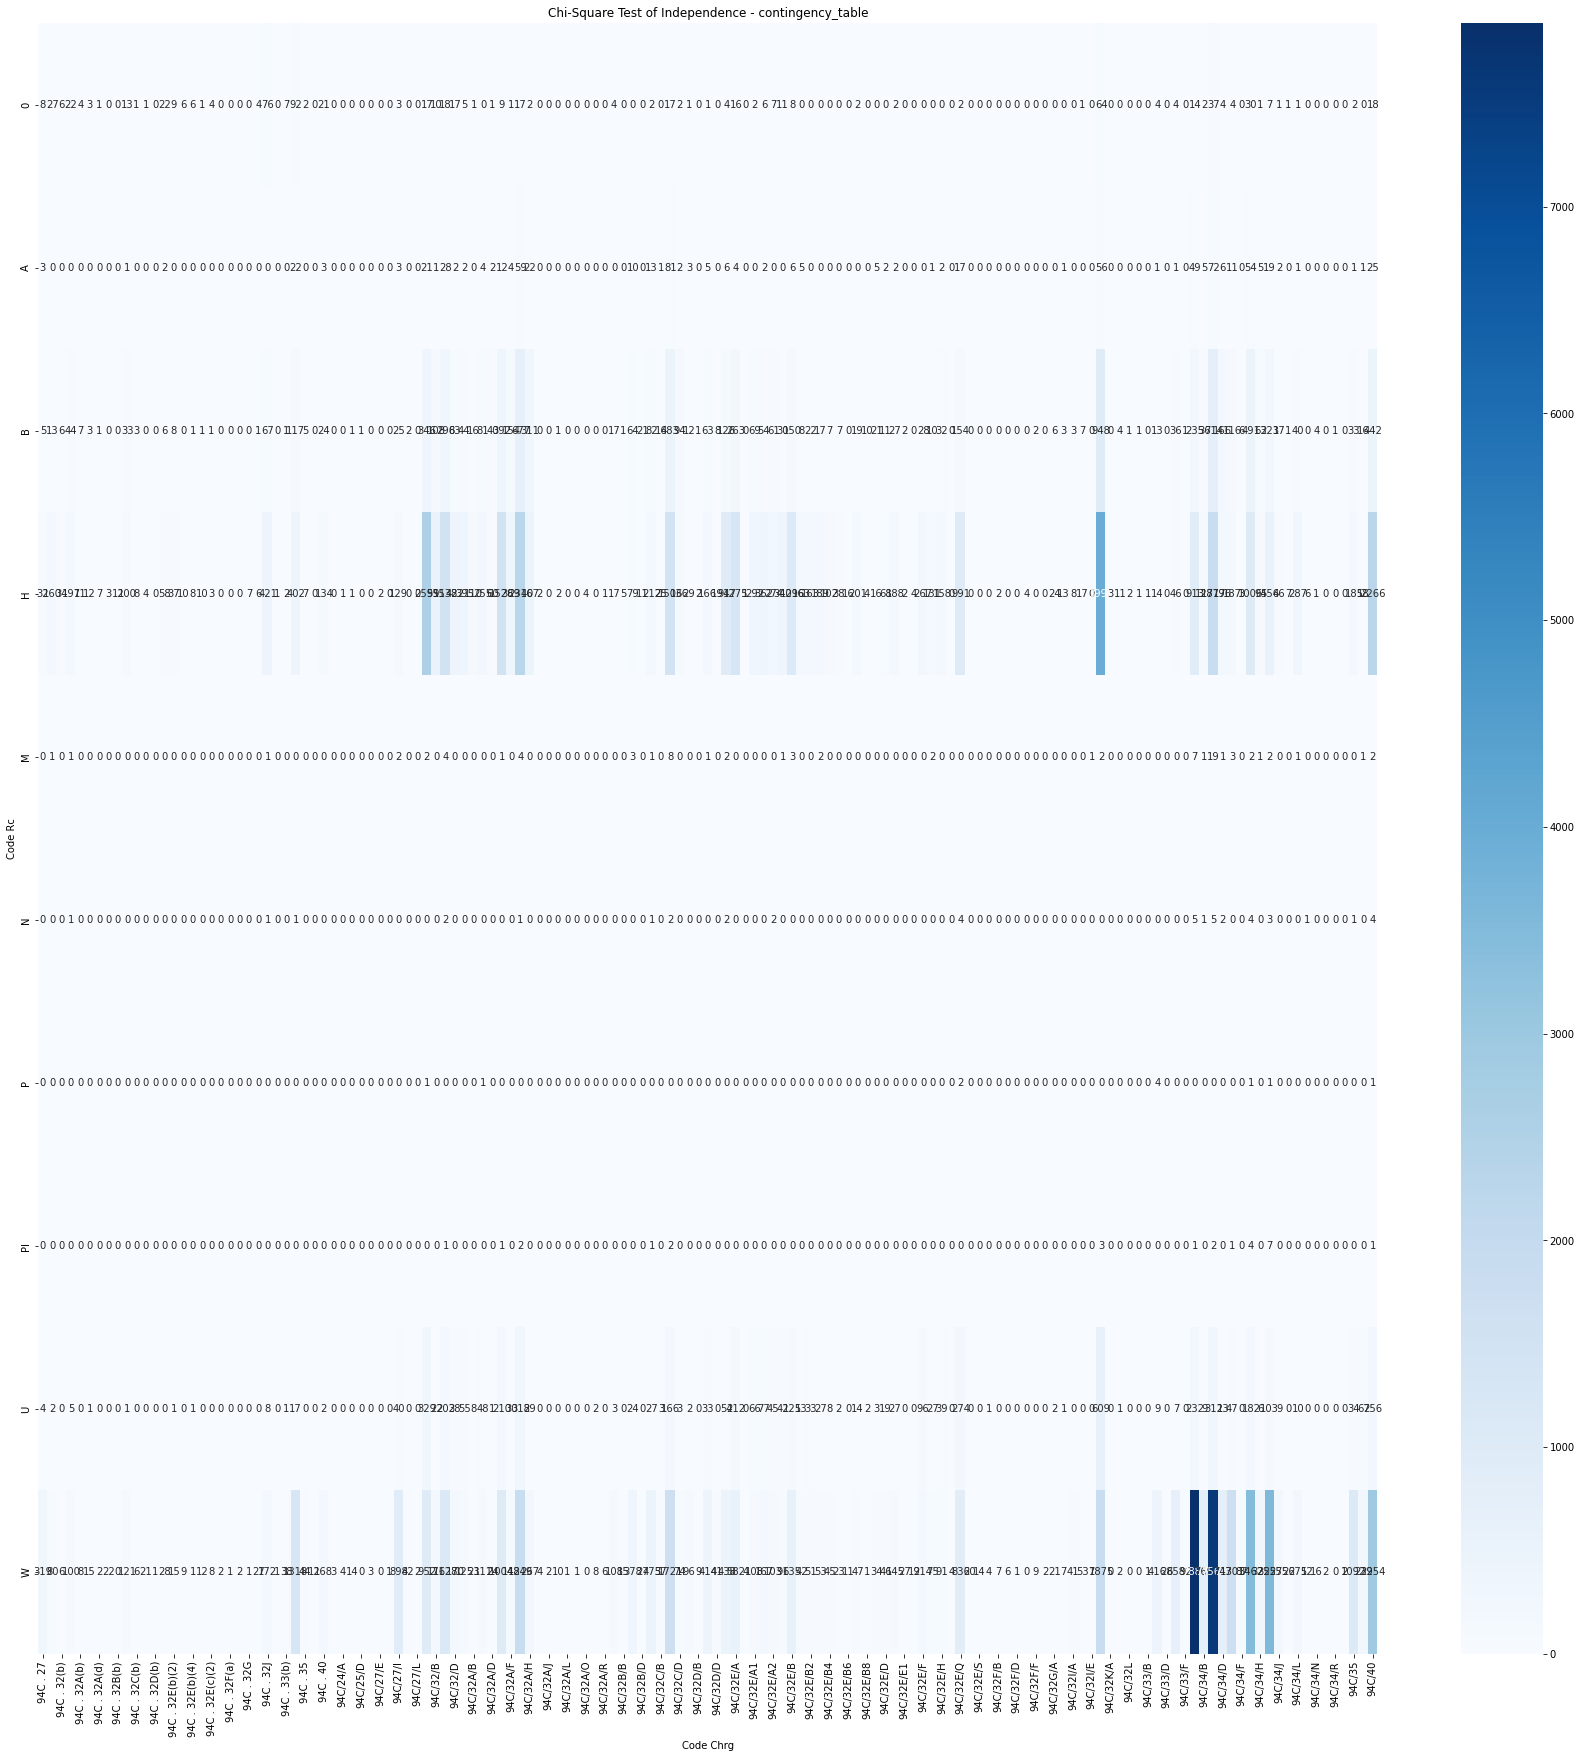





probability=0.950, critical=1362.280, stat=30772.954
Dependent (reject H0)




significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
chi_square_test(data_essex_94C, "Code Rc", "Code Chrg")

Chi-square test of independence
Chi-square value: 3450.407507741984
p-value: 0.0
Degrees of freedom: 657
Expected values:
[[2.45499288e+00 2.12080537e-01 1.83803132e+00 1.18893634e-01
  3.18763474e+00 4.38621110e+00 6.16961562e-01 7.48387228e+00
  4.11307708e-01 1.63880415e-01 1.92800488e-02 1.92800488e-02
  1.60667073e-02 3.21334147e-03 5.84828147e+00 5.78401464e-02
  1.36020744e+01 7.39068538e-02 4.65934513e-01 2.57067317e-02
  6.42668294e-02 1.51958918e+01 9.64002441e-03 8.09762050e-01
  7.71201952e-02 2.89200732e-02 6.74801708e-02 9.64002441e-03
  2.21720561e-01 5.14134635e-02 1.60667073e-02 5.94789506e+00
  4.82001220e-02 2.95627415e-01 3.53467562e-02 1.73520439e-01
  1.28533659e-02 2.57067317e-02 4.17734391e-02 2.24933903e-01
  1.44600366e-01 1.51027049e-01 4.82001220e-02 2.21720561e+00
  8.90095587e-01 1.14073622e+00 2.92414074e-01 4.65934513e-01
  1.11824283e+00 2.50640635e-01 3.53467562e-02 1.60667073e-02
  3.21334147e-03 3.21334147e-03 3.21334147e-03 9.96135855e-02
  2.892007

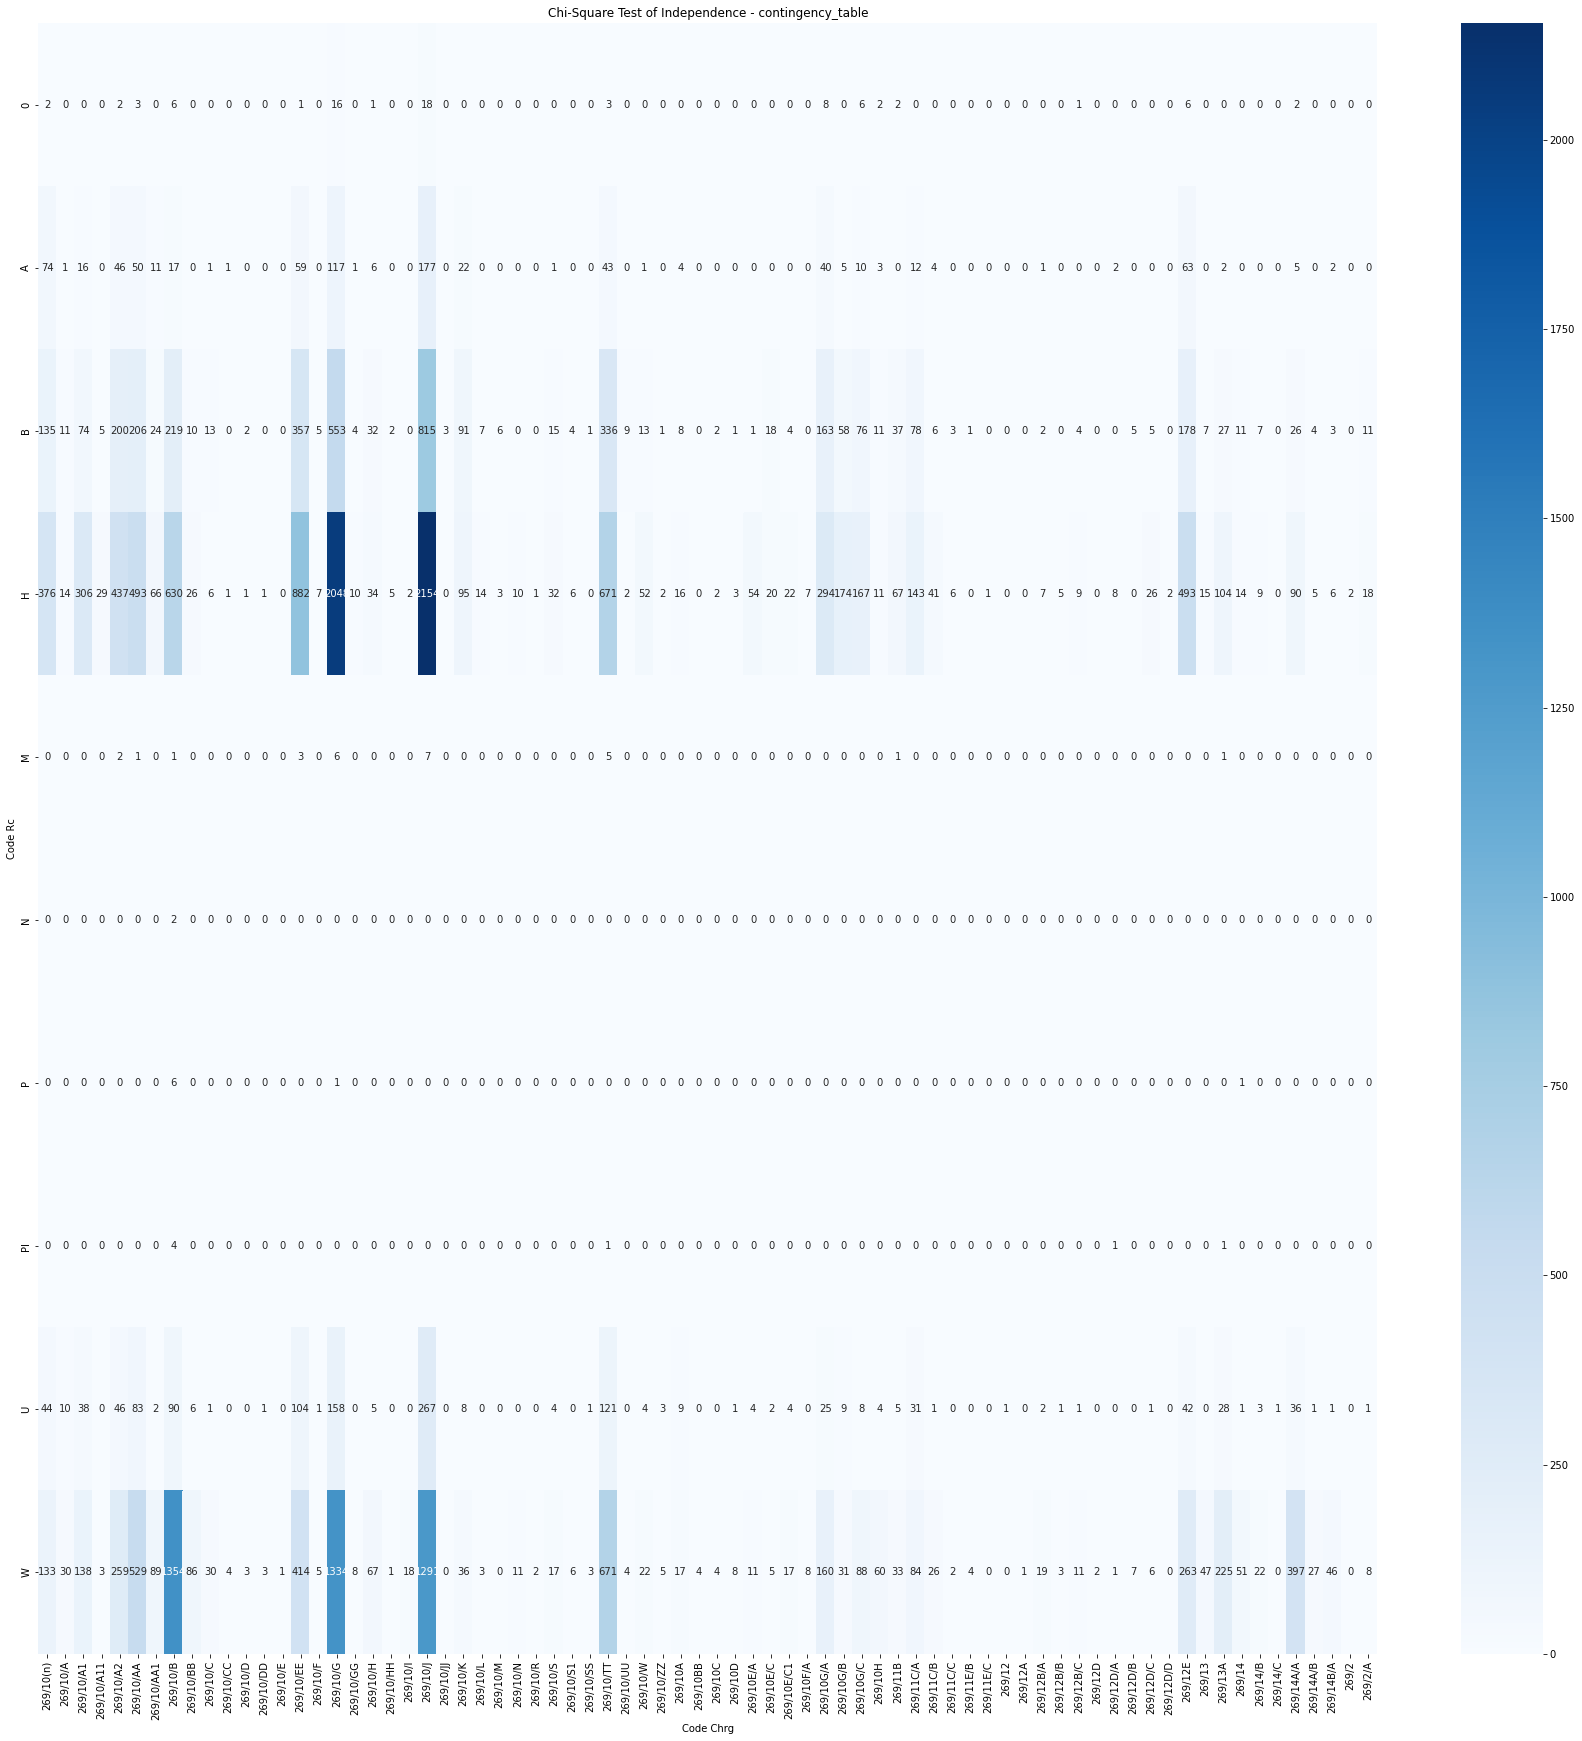





probability=0.950, critical=717.740, stat=3450.408
Dependent (reject H0)




significance=0.050, p=0.000
Dependent (reject H0)


In [ ]:
#chi-square for 269
data_essex_269 = data_essex_drpna[data_essex_drpna["Code Chrg"].str.contains("269/", na=False)]
chi_square_test(data_essex_269, "Code Rc", "Code Chrg")